In [11]:
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option("display.float_format", "{:.5f}".format)

In [ ]:
files = ["2019-01", "2019-07", "2020-01", "2020-07"]
df = pd.concat(
    [
        pd.read_csv(
            f"../data/nyc_taxi_{fn}.csv",
            usecols=[
                "tpep_pickup_datetime",
                "passenger_count",
                "trip_distance",
                "total_amount",
            ],
            parse_dates=["tpep_pickup_datetime"],
        )
        for fn in files
    ]
)
df.describe()

,tpep_pickup_datetime,passenger_count,trip_distance,total_amount
count,21183631,21021384.00000,21183631.00000,21183631.00000
mean,2019-07-21 01:38:21.157452544,1.54634,2.98881,17.86570
min,2001-02-02 14:55:07,0.00000,-30.62000,-1242.30000
25%,2019-01-23 04:10:17,1.00000,0.95000,9.96000
50%,2019-07-16 13:12:46,1.00000,1.60000,13.55000
75%,2020-01-10 23:03:10,2.00000,2.99000,19.30000
max,2088-01-24 00:25:39,9.00000,256069.13000,623261.66000
std,NaN,1.19442,102.85825,158.28544


# Extension questions
1. Load the taxi data from 2019 and 2020 for January and July. Remove data from outside of those years and months. Display the number of trips on each day of the month in four separate graphs: the top row in 2019 and the bottom row in 2020, the left column for January and the right column for July.
2. Add a `trip_length` column for short, medium, and long trips. Show the trip distance per day of month in three plots alongside one another, with one for each category.
3. Create a bar plot showing how many rides take place in each hour in each month. Each month should appear in a different colour, and they should appear side by side with January being on the left and July on the right.

In [46]:
# clean up the date data, adding columns for `month` and `year` and dropping all data not in January or July 2020
# add some extra columns to help with categorisation later
df["trip_length"] = pd.cut(
    df["trip_distance"],
    bins=[0, 2, 10, float("inf")],
    include_lowest=True,
    labels=["short", "medium", "long"],
)
df["month"] = df["tpep_pickup_datetime"].dt.month
df["year"] = df["tpep_pickup_datetime"].dt.year
df["day"] = df["tpep_pickup_datetime"].dt.day
df = df.loc[(df["month"].isin((1, 7))) & (df["year"].isin((2019, 2020)))]
df.loc[slice(None, None), "hour"] = pd.Categorical(
    df["tpep_pickup_datetime"].dt.hour, ordered=True
)
weekday_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]
df.loc[slice(None, None), "weekday"] = pd.Categorical(
    df["tpep_pickup_datetime"].dt.day_name(), categories=weekday_order, ordered=True
)
# make the `passenger_count` column be used as categorical data
df["passenger_count"] = df["passenger_count"].astype("category")
# reset the index to get rid of gaps from the dropped data
df = df.reset_index(drop=True)
df.head()

,tpep_pickup_datetime,passenger_count,trip_distance,total_amount,trip_length,month,year,day,weekday,hour
0,2019-01-01 00:46:40,1.00000,1.50000,9.95000,short,1,2019,1,Tuesday,0
1,2019-01-01 00:59:47,1.00000,2.60000,16.30000,medium,1,2019,1,Tuesday,0
2,2019-01-01 00:21:28,1.00000,1.30000,9.05000,short,1,2019,1,Tuesday,0
3,2019-01-01 00:32:01,1.00000,3.70000,18.50000,medium,1,2019,1,Tuesday,0
4,2019-01-01 00:57:32,2.00000,2.10000,13.00000,medium,1,2019,1,Tuesday,0


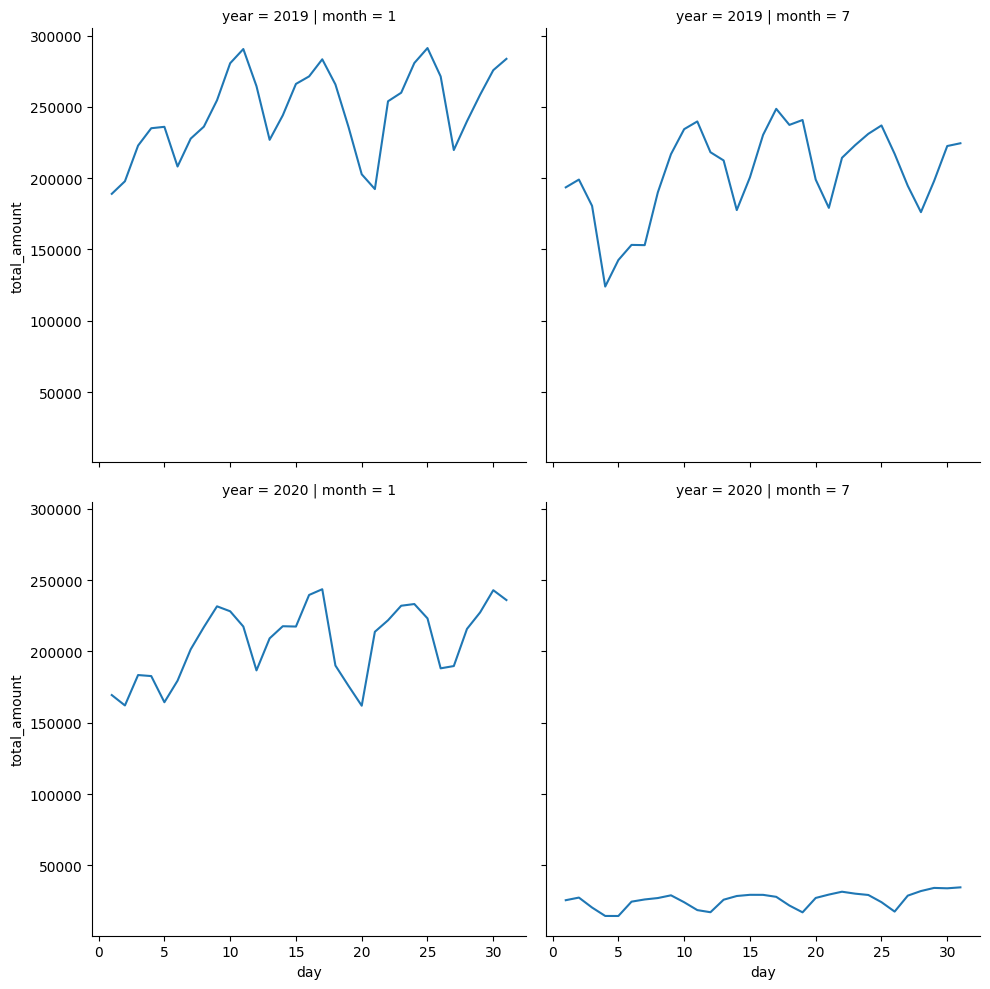

In [ ]:
# trips per day, month by month and year by year
sns.relplot(
    kind="line",
    x="day",
    y="total_amount",
    row="year",
    col="month",
    data=df.groupby(["year", "month", "day"])[["total_amount"]].count().reset_index(),
)

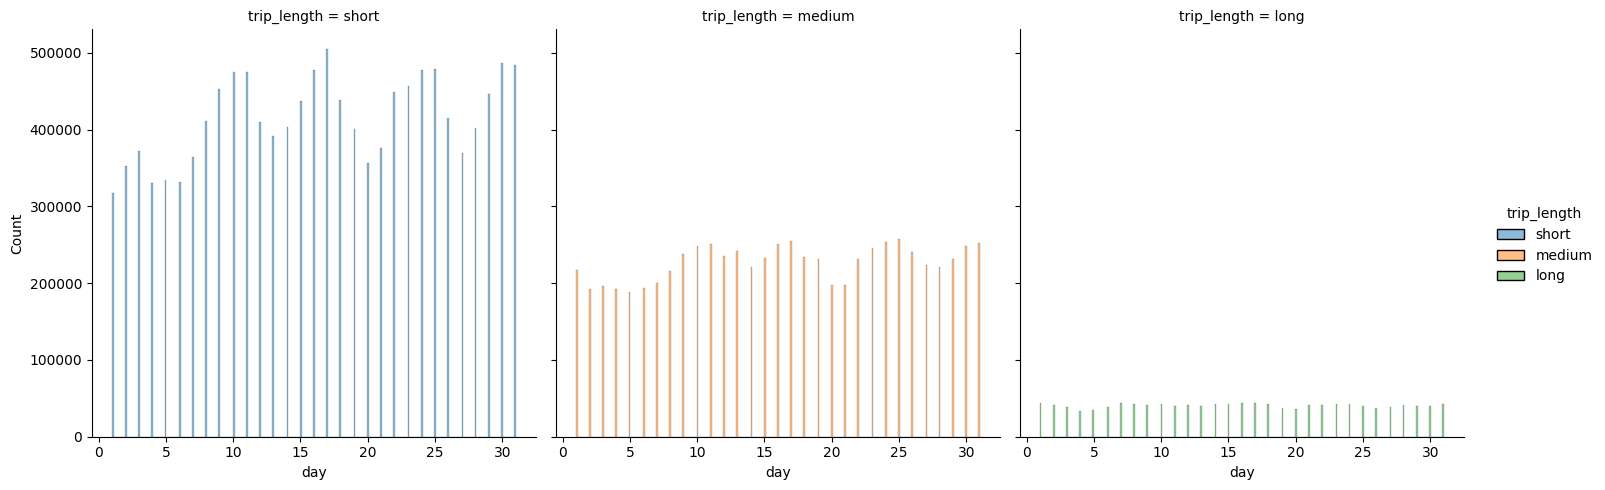

In [ ]:
# trip distance per day of the month, with one chart for each category
# sns.relplot(
#     kind="line",
#     x="day",
#     y="total_amount",
#     col="trip_length",
#     data=df.groupby(["trip_length", "day"], observed=False)[["total_amount"]].count().reset_index()
# )
sns.displot(
    x="day", col="trip_length", hue="trip_length", data=df[["day", "trip_length"]]
)

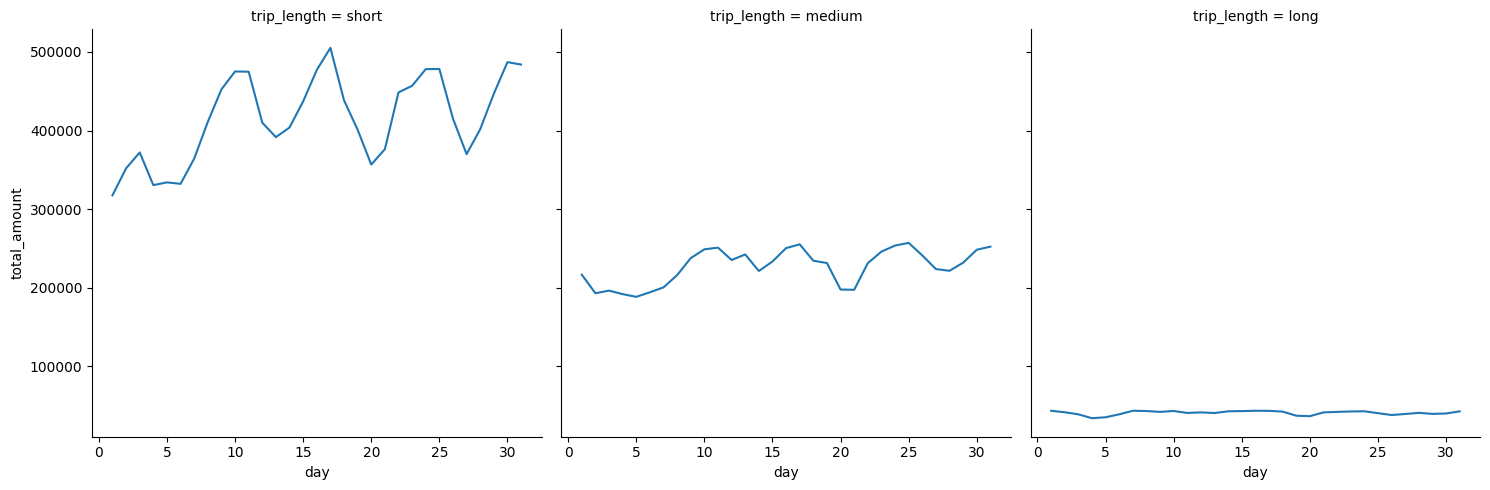

In [45]:
# honestly the line chart works fine for this too, and considering the sample solution for this doesn't
# actually answer the given question :shrug:
sns.relplot(
    kind="line",
    x="day",
    y="total_amount",
    col="trip_length",
    data=df.groupby(["trip_length", "day"], observed=False)[["total_amount"]]
    .count()
    .reset_index(),
)

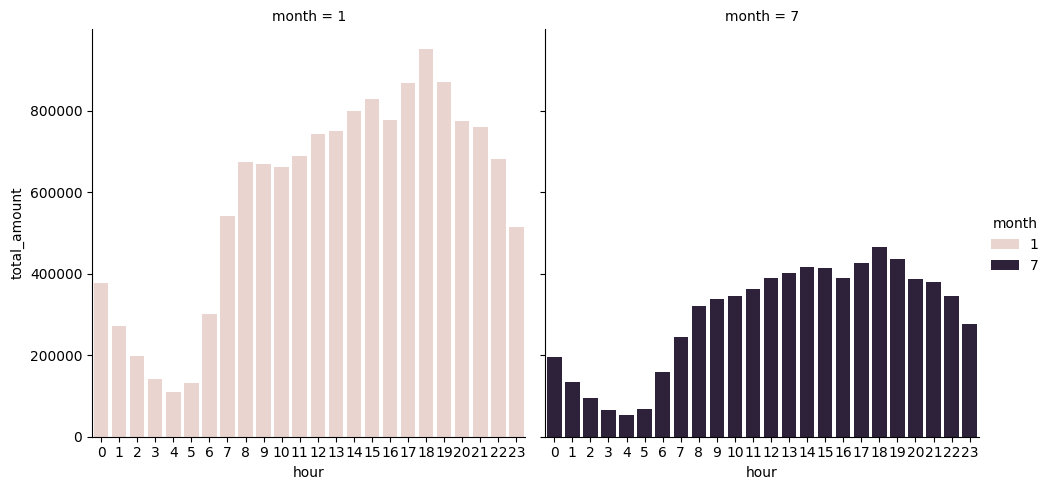

In [47]:
# Create a bar plot showing how many rides take place in each hour in each month. Each month should appear in a different colour,
# and they should appear side by side with January being on the left and July on the right.
sns.catplot(
    kind="bar",
    x="hour",
    y="total_amount",
    col="month",
    hue="month",
    data=df.groupby(["hour", "month"], observed=False)[["total_amount"]]
    .count()
    .reset_index(),
)
# the sample solution again, not showing what it says it is supposed to

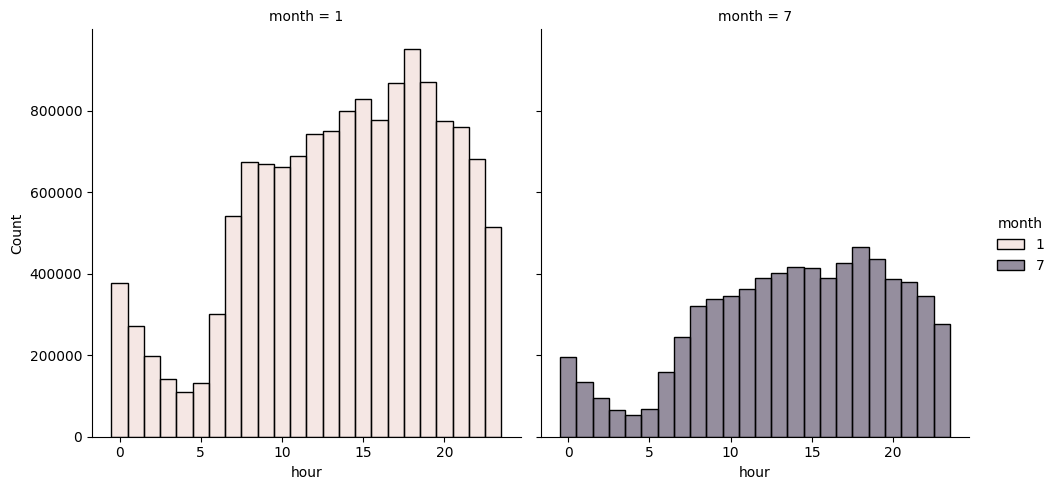

In [48]:
# book uses a histogram (although didn't include the 'col' parameter, as it was supposed to)
sns.displot(data=df, x="hour", hue="month", col="month")
